# Analyzing CIA Factbook Data Using SQLite and Python

In this project, I'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. I will be querying tables from an SQLite database which I have downloaded from here https://github.com/factbook/factbook.sql/releases. This project is intended to showcase some of the SQL skills I have acquired and integrate them into a Data Science workflow using pandas and matplotlib along side it.

In [42]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
conn = sqlite3.connect('/Users/miesner.jacob/Desktop/DataQuest/factbook.db')
q = "select * from facts"
facts = pd.read_sql_query(q, conn)
facts

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230.0,652230.0,0.0,3.256434e+07,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748.0,27398.0,1350.0,3.029278e+06,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741.0,2381741.0,0.0,3.954217e+07,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468.0,468.0,0.0,8.558000e+04,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700.0,1246700.0,0.0,1.962535e+07,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,9.243600e+04,1.24,15.85,5.69,2.21,2015-11-01 13:20:13.049627,2015-11-01 13:20:13.049627
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,4.343189e+07,0.93,16.64,7.33,0.00,2015-11-01 13:20:18.233063,2015-11-01 13:20:18.233063
7,8,am,Armenia,29743.0,28203.0,1540.0,3.056382e+06,0.15,13.61,9.34,5.80,2015-11-01 13:20:23.048753,2015-11-01 13:20:23.048753
8,9,as,Australia,7741220.0,7682300.0,58920.0,2.275101e+07,1.07,12.15,7.14,5.65,2015-11-01 13:20:28.186341,2015-11-01 13:20:28.186341
9,10,au,Austria,83871.0,82445.0,1426.0,8.665550e+06,0.55,9.41,9.42,5.56,2015-11-01 13:20:33.093597,2015-11-01 13:20:33.093597


In [38]:
facts['population'].isnull().value_counts()

False    242
True      19
Name: population, dtype: int64

In [8]:
q2 = "select * from facts limit 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


## Calculating Summary Statistics

In [25]:
q3 = '''select min(population) minimum_population, 
        max(population) maximum_population, 
        min(population_growth) minimum_population_growth, 
        max(population_growth) maximum_population_growth 
        from facts'''
        
df = pd.read_sql_query(q3, conn)
df['minimum_population'] = df['minimum_population'].astype(int)
df['maximum_population'] = df['maximum_population'].astype(int)
df['minimum_population_growth'] = df['minimum_population_growth'].astype(float).map("{:.2%}".format)
df['maximum_population_growth'] = df['maximum_population_growth'].astype(float).map("{:.2%}".format)
df

,minimum_population,maximum_population,minimum_population_growth,maximum_population_growth
0,0,7256490011,0.00%,402.00%


### Finding Countries that had Min & Max populations (Outliers)

In [32]:
#Min Population Country

q4 = '''select * from facts
        where population == (select min(population) from facts)'''
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [33]:
#Max Population Country

q5 = '''select * from facts
        where population == (select max(population) from facts)'''
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


From before we saw in the full dataset that 19 rows had null values for population. Antartica has the lowest population of all rows without a null value. The max value for population is held in a row with the country value == World. Since we know this is not a country lets take a look at what the next highest value is.

In [41]:
#Max Population Country

q5 = '''select * from facts
        order by population
        desc
        limit 2'''
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,NaN,NaN,NaN,7256490011,1.08,18.60,7.80,NaN,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721
1,37,ch,China,9596960.0,9326410.0,270550.0,1367485388,0.45,12.49,7.53,0.44,2015-11-01 13:22:53.813142,2015-11-01 13:22:53.813142


Here we see that China is the country with the highest population with roughly 1.3 billion people!

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a65add8>,
      dtype=object)

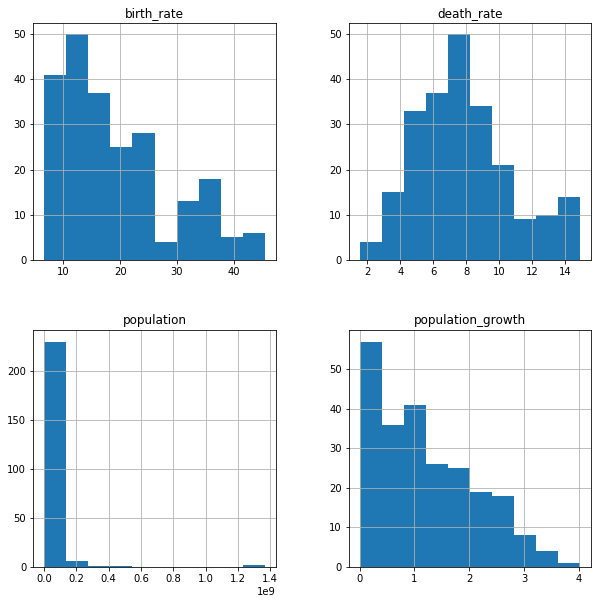

In [43]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q6, conn).hist(ax=ax)

The histograms above show a right skew for birth_rate, population_growth, and population (which has an outlier 'world' row), and a distribution for death_rate that looks close to normal.